In [15]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/data.csv")

# Drop unnecessary columns
df = df.drop(["id", "Unnamed: 32"], axis=1)

# Convert target column (M=1, B=0)
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

# Separate features and target
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

print("Dataset loaded successfully")
print("Shape:", df.shape)


Dataset loaded successfully
Shape: (569, 31)


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# Standardization
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Data split and standardized")


Data split and standardized


In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

print("Model trained successfully")


Model trained successfully


In [18]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Precision
print("Precision:", precision_score(y_test, y_pred))

# Recall
print("Recall:", recall_score(y_test, y_pred))

# ROC-AUC
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))


Confusion Matrix:
 [[70  1]
 [ 2 41]]
Precision: 0.9761904761904762
Recall: 0.9534883720930233
ROC-AUC Score: 0.99737962659679


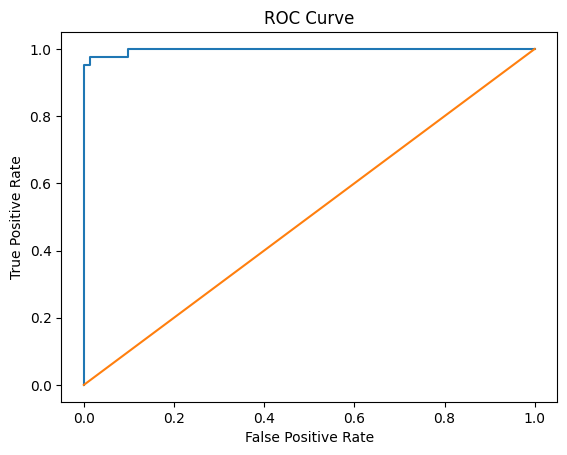

In [19]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


In [20]:
custom_threshold = 0.3

y_custom_pred = (y_prob >= custom_threshold).astype(int)

print("Confusion Matrix (Threshold = 0.3):")
print(confusion_matrix(y_test, y_custom_pred))


Confusion Matrix (Threshold = 0.3):
[[67  4]
 [ 1 42]]


In [ ]:
### ✅ Sigmoid Function (Short Explanation)

The **Sigmoid Function** is used in Logistic Regression to convert the model’s output into a probability between **0 and 1**.

Its formula is:

[
\sigma(z) = \frac{1}{1 + e^{-z}}
]

It takes any real value (−∞ to +∞) and transforms it into a probability.

* If output > 0.5 → Class 1
* If output < 0.5 → Class 0

In simple words, it helps Logistic Regression make classification decisions by converting values into probabilities.


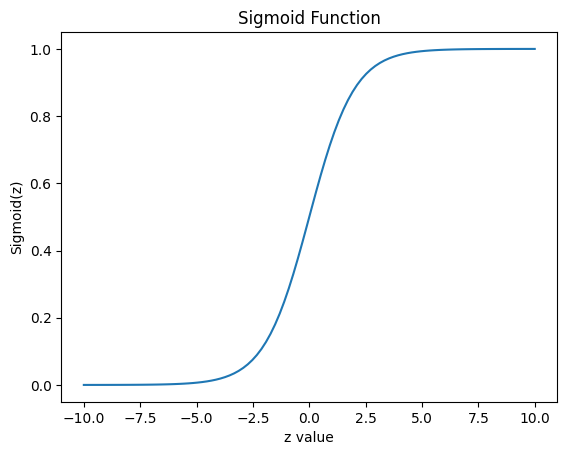

In [21]:
import numpy as np

z = np.linspace(-10, 10, 100)
sigmoid = 1 / (1 + np.exp(-z))

plt.figure()
plt.plot(z, sigmoid)
plt.xlabel("z value")
plt.ylabel("Sigmoid(z)")
plt.title("Sigmoid Function")
plt.show()
